In [37]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib


In [2]:
# Load CSV
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Convert all column names to snake_case
df.columns = (
    df.columns
      .str.replace('([A-Z])', r'_\1', regex=True)
      .str.lower()
      .str.strip('_')
)

In [6]:
# rename selected columns
df.rename(columns={
    'customer_i_d': 'customer_id',
    'streaming_t_v': 'streaming_tv'
}, inplace=True)

In [7]:
# Convert TotalCharges to float
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

In [49]:
# Fill blank cells
df['total_charges'] = df['total_charges'].fillna(df['total_charges'].median())

In [54]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   int64  
 4   dependents         7043 non-null   int64  
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   int64  
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [55]:
# Identify Column Types

In [77]:
# 1. Binary Yes/No columns
binary_cols = [
    'partner', 'dependents', 'phone_service',
    'paperless_billing', 'churn'
]


In [78]:
# 2. Multi-class categorical columns
multi_class_cols = [
    'gender', 'multiple_lines', 'internet_service',
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies',
    'contract', 'payment_method'
]


In [79]:
# 3. Numeric columns
numeric_cols = ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']


In [80]:
# Encode Binary Columns using LabelEncoder
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [81]:
# OneHotEncode Multi-Class Columns
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), multi_class_cols)
    ],
    remainder='passthrough'
)


In [82]:
# Define Target & Features
X = df.drop('churn', axis=1)
y = df['churn']


In [87]:
df = df.drop('customer_id', axis=1, errors='ignore')


In [84]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [85]:
# Logistic Regression Pipeline + Scaling
lr_pipeline = Pipeline(steps=[
    ('encoder', ct),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)


,steps,"[('encoder', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehot', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



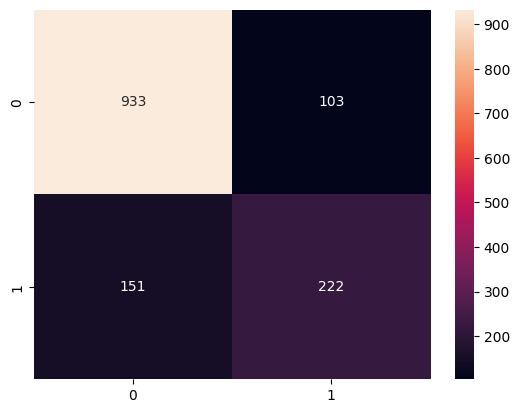

In [88]:
# Evaluate Logistic Regression
y_pred_lr = lr_pipeline.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.show()


In [89]:
# Random Forest Classifier
rf_pipeline = Pipeline(steps=[
    ('encoder', ct),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



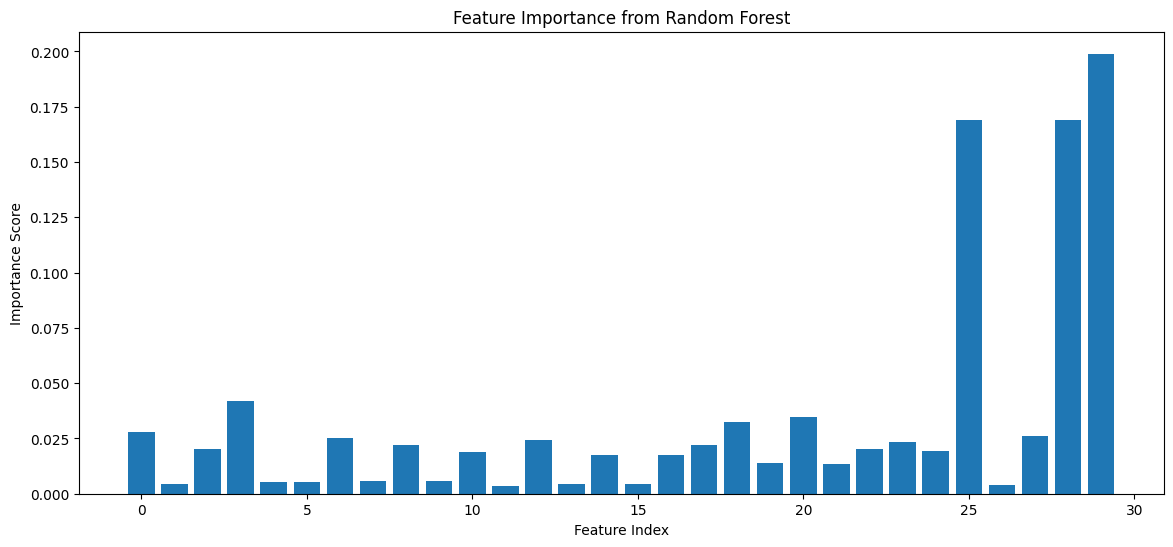

In [90]:
# Feature Importance
rf_model = rf_pipeline.named_steps['model']
importances = rf_model.feature_importances_

plt.figure(figsize=(14,6))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()


In [91]:
# Save Your Best Model (joblib)
joblib.dump(rf_pipeline, "customer_churn_model.joblib")
print("Model saved successfully!")


Model saved successfully!
